<a href="https://colab.research.google.com/github/AymericShini/python-base/blob/master/exercice4_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy matplotlib pandas seaborn
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [61]:
df = pd.read_csv(r"/content/IBM_HR_ATTRITION.csv")

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [19]:
sns.relplot(x="date", y="item_price", data=df)

ValueError: ignored

In [ ]:
df2= df.sample(n=50)

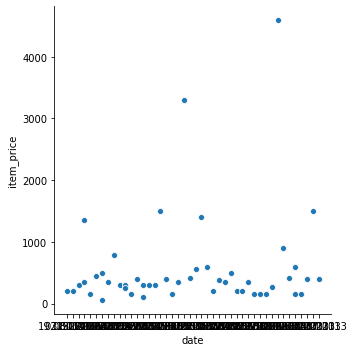

In [ ]:
sns.relplot(x="date", y="item_price", data=df2)

In [ ]:
df2.date =  pd.to_datetime(df2.date)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 797044 to 649156
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            50 non-null     datetime64[ns]
 1   date_block_num  50 non-null     float64       
 2   shop_id         50 non-null     float64       
 3   item_id         50 non-null     float64       
 4   item_price      50 non-null     float64       
 5   item_cnt_day    50 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.7 KB


In [68]:
sns.set()

In [20]:
df3 = pd.Series(df.MonthlyIncome, name="MonthlyIncome")

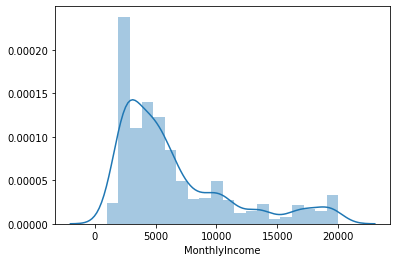

In [21]:
ax = sns.distplot(df3)

In [24]:
df4 = df.query("MonthlyIncome <= 5000 & MonthlyIncome > 0").MonthlyIncome

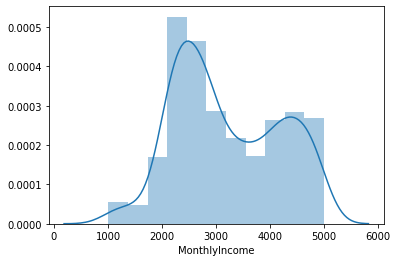

In [25]:
ax2 = sns.distplot(df4)

In [63]:
df.Attrition = df.Attrition.map(dict(Yes=1, No=0))

In [65]:
df.Attrition

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

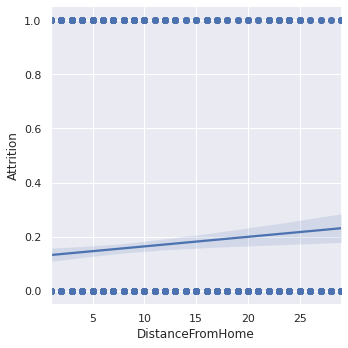

In [69]:
sns.lmplot(y="Attrition", x="DistanceFromHome", data=df)

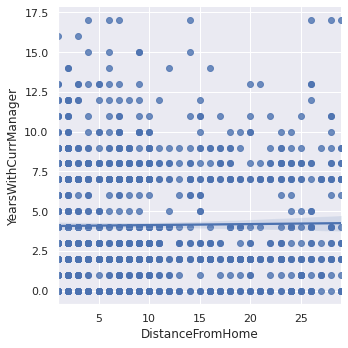

In [70]:
df5 = sns.lmplot(y="YearsWithCurrManager", x="DistanceFromHome", data=df)

In [72]:
pricing = pd.read_csv(r"/content/house_pricing.csv")

In [73]:
pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [83]:
pricing = pricing[pricing.columns[66:81]] 

In [84]:
pricingCorr = pricing.corr()

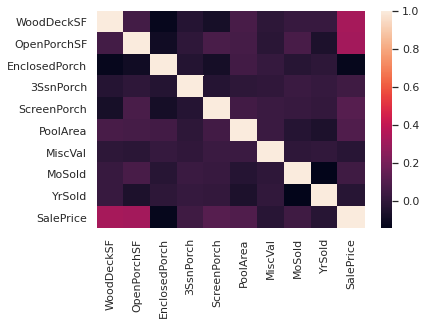

In [85]:
sns.heatmap(pricingCorr, 
        xticklabels=pricingCorr.columns,
        yticklabels=pricingCorr.columns)

In [86]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

pricingCorr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
WoodDeckSF,1.00,0.06,-0.13,-0.03,-0.07,0.07,-0.01,0.02,0.02,0.32
OpenPorchSF,0.06,1.00,-0.09,-0.01,0.07,0.06,-0.02,0.07,-0.06,0.32
EnclosedPorch,-0.13,-0.09,1.00,-0.04,-0.08,0.05,0.02,-0.03,-0.01,-0.13
3SsnPorch,-0.03,-0.01,-0.04,1.00,-0.03,-0.01,0.00,0.03,0.02,0.04
ScreenPorch,-0.07,0.07,-0.08,-0.03,1.00,0.05,0.03,0.02,0.01,0.11
PoolArea,0.07,0.06,0.05,-0.01,0.05,1.00,0.03,-0.03,-0.06,0.09
MiscVal,-0.01,-0.02,0.02,0.00,0.03,0.03,1.00,-0.01,0.00,-0.02
MoSold,0.02,0.07,-0.03,0.03,0.02,-0.03,-0.01,1.00,-0.15,0.05
YrSold,0.02,-0.06,-0.01,0.02,0.01,-0.06,0.00,-0.15,1.00,-0.03
SalePrice,0.32,0.32,-0.13,0.04,0.11,0.09,-0.02,0.05,-0.03,1.00
